## CI7000: Project Dissertation
### Machine Learning-Based Hybrid Sales Forecasting for Retail Financial Planning

>> Name: Pragati Priya

>> Student ID: K2461276

>> Date: 01/02/2026

## ** SECONDARY FILE

## Segment based Forecasting and Result using Prophet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from prophet import Prophet
from prophet.make_holidays import make_holidays_df

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = pd.read_csv(r"data.csv", sep=None, engine="python", on_bad_lines="error")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
retail_data = data.copy()
retail_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [4]:
retail_data["Postal Code"] = retail_data["Postal Code"].fillna(00000.0) # Filling with zeros as it wasn't feasible to locate the exact code.
retail_data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [5]:
retail_data["Order Date"] = pd.to_datetime(retail_data["Order Date"], format="%d/%m/%Y", errors="coerce")
retail_data["Ship Date"] = pd.to_datetime(retail_data["Ship Date"], format="%d/%m/%Y", errors="coerce")
retail_data = retail_data.sort_values("Order Date").reset_index(drop=True) #sorted it by date
retail_data = retail_data.drop(columns=["index", "level_0"], errors="ignore") #removed unnecessary columns with similar info 

retail_data["Year"] = retail_data["Order Date"].dt.year
retail_data["Quarter"] = retail_data["Order Date"].dt.quarter
retail_data["Month"] = retail_data["Order Date"].dt.month
retail_data["Month_name"] = retail_data["Order Date"].dt.month_name()
retail_data["Day_of_month"] = retail_data["Order Date"].dt.day
retail_data["Day_of_year"] = retail_data["Order Date"].dt.dayofyear
retail_data["Day_of_week"] = retail_data["Order Date"].dt.weekday
retail_data["Weekday_name"] = retail_data["Order Date"].dt.day_name()
iso = retail_data["Order Date"].dt.isocalendar()
retail_data["Week_of_year"] = iso.week.astype(int)
retail_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Year,Quarter,Month,Month_name,Day_of_month,Day_of_year,Day_of_week,Weekday_name,Week_of_year
0,7981,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,16.448,2015,1,1,January,3,3,5,Saturday,1
1,742,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,3.540,2015,1,1,January,4,4,6,Sunday,1
2,741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,272.736,2015,1,1,January,4,4,6,Sunday,1
3,740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,11.784,2015,1,1,January,4,4,6,Sunday,1
4,1760,CA-2015-141817,2015-01-05,2015-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19.536,2015,1,1,January,5,5,0,Monday,2


/var/folders/qw/q7626nwn3h97_4rct7m6kw4h0000gn/T/ipykernel_16017/3308556369.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales = (seg_data.set_index("Order Date").resample("M")["Sales"].sum()
20:18:00 - cmdstanpy - INFO - Chain [1] start processing
20:18:00 - cmdstanpy - INFO - Chain [1] done processing


=== Prophet Results for Consumer Segment ===
MAE : 9,089.18
RMSE: 10,852.46
MAPE: 34.54%
MPE: 25.71%


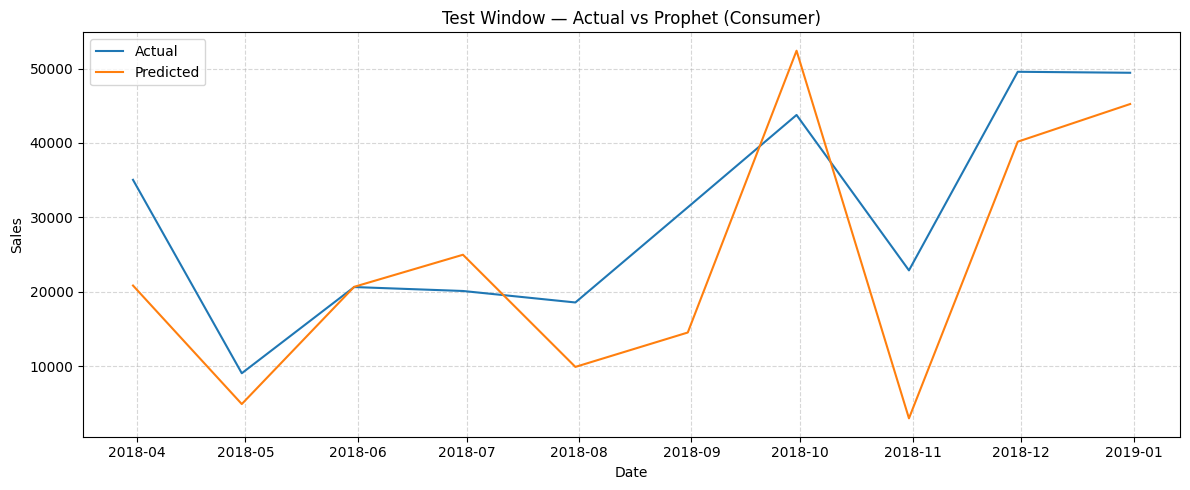

/var/folders/qw/q7626nwn3h97_4rct7m6kw4h0000gn/T/ipykernel_16017/3308556369.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales = (seg_data.set_index("Order Date").resample("M")["Sales"].sum()
20:18:00 - cmdstanpy - INFO - Chain [1] start processing
20:18:00 - cmdstanpy - INFO - Chain [1] done processing


=== Prophet Results for Corporate Segment ===
MAE : 9,603.98
RMSE: 11,847.41
MAPE: 49.60%
MPE: -27.38%


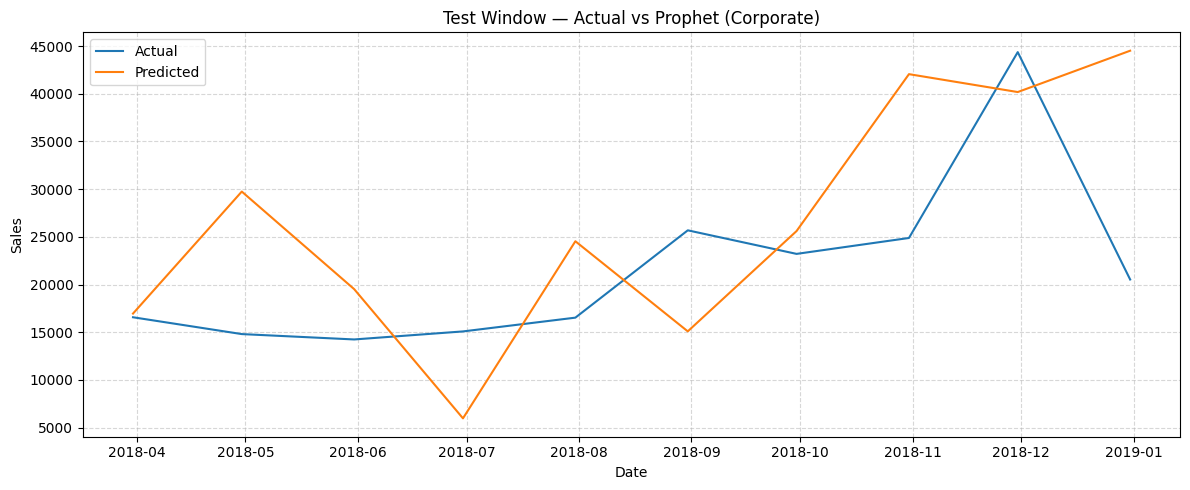

/var/folders/qw/q7626nwn3h97_4rct7m6kw4h0000gn/T/ipykernel_16017/3308556369.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sales = (seg_data.set_index("Order Date").resample("M")["Sales"].sum()
20:18:00 - cmdstanpy - INFO - Chain [1] start processing
20:18:01 - cmdstanpy - INFO - Chain [1] done processing


=== Prophet Results for Home Office Segment ===
MAE : 6,403.87
RMSE: 7,919.66
MAPE: 51.47%
MPE: 4.07%


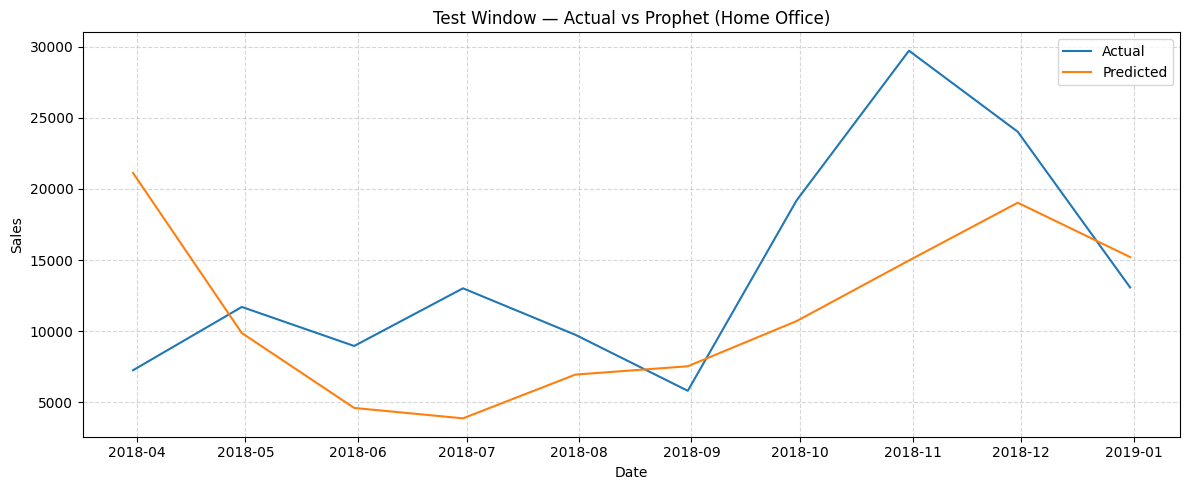

In [6]:
segments = ["Consumer", "Corporate", "Home Office"]

for seg in segments:
    seg_data = retail_data.loc[retail_data["Segment"] == seg].copy()

    sales = (seg_data.set_index("Order Date").resample("M")["Sales"].sum()
             .reset_index()
             .rename(columns={"Order Date": "ds", "Sales": "y"}))

    sales["month"] = sales["ds"].dt.month
    sales["is_black_friday"] = (sales["month"] == 11).astype(int)
    sales["is_september"] = (sales["month"] == 9).astype(int)
    sales["is_november"] = (sales["month"] == 11).astype(int)   # (same as black friday flag)
    sales["is_december"] = (sales["month"] == 12).astype(int)
    sales["is_january"] = (sales["month"] == 1).astype(int)

    split_point = int(len(sales) * 0.8)
    train_ppt = sales.iloc[:split_point].copy()
    test_ppt  = sales.iloc[split_point:].copy()

    freq = "M"
    model_ppt = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=False,
        daily_seasonality=False,
        seasonality_mode="multiplicative",
        changepoint_prior_scale=0.09)

    model_ppt.add_seasonality(name="quarterly", period=91.25, fourier_order=2)

    model_ppt.add_regressor("is_black_friday", mode="multiplicative")
    model_ppt.add_regressor("is_september", mode="multiplicative")
    model_ppt.add_regressor("is_november", mode="multiplicative")
    model_ppt.add_regressor("is_december", mode="multiplicative")
    model_ppt.add_regressor("is_january", mode="additive")

    model_ppt.add_country_holidays(country_name="US")

    reg_cols = ["is_black_friday","is_september","is_november","is_december","is_january"]
    model_ppt.fit(train_ppt[["ds","y"] + reg_cols])

    future = test_ppt[["ds"]].copy()
    future["month"] = future["ds"].dt.month
    future["is_black_friday"] = (future["month"] == 11).astype(int)
    future["is_september"] = (future["month"] == 9).astype(int)
    future["is_november"] = (future["month"] == 11).astype(int)
    future["is_december"] = (future["month"] == 12).astype(int)
    future["is_january"] = (future["month"] == 1).astype(int)
    future = future[["ds"] + reg_cols]

    fcst = model_ppt.predict(future)
    pred_ppt = fcst.set_index("ds")["yhat"]

    mask = test_ppt["y"] != 0
    actuals = test_ppt.loc[mask, "y"].values
    preds = pred_ppt.loc[test_ppt.loc[mask, "ds"]].values

    mae = mean_absolute_error(actuals, preds)
    rmse = np.sqrt(((actuals - preds) ** 2).mean())
    mape = np.mean(np.abs((actuals - preds) / actuals)) * 100
    mpe = np.mean((actuals - preds) / actuals) * 100

    print(f"=== Prophet Results for {seg} Segment ===")
    print(f"MAE : {mae:,.2f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"MAPE: {mape:,.2f}%")
    print(f"MPE: {mpe:,.2f}%")

    fig, ax = plt.subplots(figsize=(12,5))
    ax.plot(test_ppt["ds"], test_ppt["y"], label="Actual")
    ax.plot(test_ppt["ds"], pred_ppt.values, label="Predicted")
    ax.set_title(f"Test Window — Actual vs Prophet ({seg})")
    ax.set_xlabel("Date")
    ax.set_ylabel("Sales")
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.legend(); plt.tight_layout(); plt.grid(True, linestyle="--", alpha=0.5); plt.show()